# Gapminder EDA and Predictive Analysis 


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [31]:
df = pd.read_csv('gapminder_data.txt', sep='\t')

In [3]:
df.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
0,Afghanistan,1800,asia,3280000,28.2,603,30.5
1,Albania,1800,europe,410000,35.4,667,38.9
2,Algeria,1800,africa,2500000,28.8,715,56.2
3,Angola,1800,africa,1570000,27.0,618,57.2
4,Antigua and Barbuda,1800,americas,37000,33.5,757,40.0
5,Argentina,1800,americas,534000,33.2,1510,47.7
6,Armenia,1800,europe,413000,34.0,514,31.5
7,Australia,1800,asia,351000,34.0,814,38.7
8,Austria,1800,europe,3210000,34.4,1850,33.4
9,Azerbaijan,1800,europe,880000,29.2,775,70.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40296 entries, 0 to 40295
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      40296 non-null  object 
 1   year         40296 non-null  int64  
 2   continent    40296 non-null  object 
 3   population   40296 non-null  int64  
 4   life_exp     40296 non-null  float64
 5   gdp_per_cap  40296 non-null  int64  
 6   gini         40296 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.2+ MB


View random rows from the dataset

In [22]:
df.sample(n=10, random_state=1)

,country,year,continent,population,life_exp,gdp_per_cap,gini
1580,Mongolia,1808,asia,619000,31.8,593,32.0
20480,Finland,1911,europe,2960000,48.6,3250,36.2
31793,Slovenia,1972,europe,1690000,68.5,14300,33.1
45,Denmark,1800,europe,1060000,37.4,2010,37.2
33207,Kyrgyz Republic,1980,asia,3610000,63.9,3540,31.2
33111,United States,1979,americas,228000000,73.7,30000,34.6
21362,Bhutan,1916,asia,148000,33.0,762,40.9
36288,Cote d Ivoire,1997,africa,15400000,52.8,3050,39.7
2788,Cameroon,1815,africa,1860000,28.8,627,41.9
11061,Botswana,1860,africa,121000,33.6,483,47.0


This data set does not have any missing values 

### Converting each column of the DataFrame into its own list to get an overview of each country based on row number

In [5]:
country = df.country.to_list()
continent = df.continent.to_list()
year = df.year.to_list()
population = df.population.to_list()
life_exp = df.life_exp.to_list()
pcgdp = df.gdp_per_cap.to_list()
gini = df.gini.to_list()

In [6]:
N = 0
print('Country: ', country[N])
print('Continent: ', continent[N])
print('Year: ', year[N])
print('Population: ', population[N])
print('Life Expectancy: ', life_exp[N])
print('Per Capita GDP: ', pcgdp[N])
print('Gini Index: ', gini[N])

Country:  Afghanistan
Continent:  asia
Year:  1800
Population:  3280000
Life Expectancy:  28.2
Per Capita GDP:  603
Gini Index:  30.5


### Displaying Past 20 years of US Data

In [7]:
minimumYear = 1999
numOfYears = 20
counter = 0

print("Year", "\tCountry", "\tPopulation", "\tLExp", "\tpcGDP", "\tGini")

for i in range(0, len(df)):
    if (year[i] >= minimumYear and country[i] == 'United States'):
        print("{0} \t{1} \t{2} \t{3} \t{4} \t{5}".format(year[i], country[i], population[i], life_exp[i], pcgdp[i], gini[i]))
        counter = counter + 1
    if(counter == numOfYears):
        break

Year 	Country 	Population 	LExp 	pcGDP 	Gini
1999 	United States 	279000000 	76.8 	44700 	40.5
2000 	United States 	282000000 	76.9 	46000 	40.5
2001 	United States 	285000000 	77.0 	46000 	40.5
2002 	United States 	288000000 	77.1 	46400 	40.5
2003 	United States 	290000000 	77.3 	47300 	40.5
2004 	United States 	293000000 	77.5 	48600 	40.6
2005 	United States 	295000000 	77.7 	49800 	40.7
2006 	United States 	298000000 	77.9 	50600 	40.8
2007 	United States 	301000000 	78.1 	51000 	40.8
2008 	United States 	303000000 	78.3 	50400 	40.8
2009 	United States 	306000000 	78.6 	48600 	40.7
2010 	United States 	309000000 	78.7 	49400 	40.7
2011 	United States 	311000000 	78.8 	49800 	40.7
2012 	United States 	313000000 	78.9 	50500 	40.8
2013 	United States 	316000000 	78.9 	51000 	41.0
2014 	United States 	318000000 	78.9 	51800 	41.2
2015 	United States 	320000000 	78.8 	52800 	41.3
2016 	United States 	322000000 	78.8 	53300 	41.4
2017 	United States 	324000000 	79.0 	54200 	41.5
2018 

### Selecting 2018 Data for Analysis

In [8]:
# Create six empty lists named: country_2018, population_2018, continent_2018, life_exp_2018, pcgdp_2018, and gini_2018.

country_2018 = []
population_2018 = []
continent_2018 = []
life_exp_2018 = []
pcgdp_2018 = []
gini_2018 = []

# Populate the new lists by looping over the original lists. At each iteration of the loop, check to 
# see if the associated record is from 2018. It is is, store each piece of the record in one of the 
# six new lists, as appopriate.

for i in range(0, len(df)):
    if(year[i] == 2018):
        country_2018.append(country[i])
        population_2018.append(population[i])
        continent_2018.append(continent[i])
        life_exp_2018.append(life_exp[i])
        pcgdp_2018.append(pcgdp[i])
        gini_2018.append(gini[i])
# Use the sum() function to calculate the total population of the world in 2018, 
# storing the result in a variable global_population_2018. 
# Print this result in the following format:

global_population_2018 = sum(population_2018)
print("The global population in 2018 was {0}".format(global_population_2018))

The global population in 2018 was 7595200200


### Identifying Countries with Largest and Smallest Populations

In [9]:

population_2018_sorted = sorted(population_2018)



tenth_largest_population = population_2018_sorted[174]
df[(df.population == tenth_largest_population) & (df.year == 2018)].iloc[0,0]




print("Countries with Largest Populations in 2018")
print("------------------------------------------")

for i in range(174, len(population_2018_sorted)):
    print("The population of {0} in 2018 was {1}."
          .format(df[(df.population == population_2018_sorted[i]) & (df.year == 2018)].iloc[0,0], population_2018_sorted[i]))
print('  ')



tenth_smallest_population = population_2018_sorted[9]
df[(df.population == tenth_smallest_population) & (df.year == 2018)].iloc[0,0]




print("Countries with Smallest Populations in 2018")
print("------------------------------------------")

for i in range(0, 10):
    print("The population of {0} in 2018 was {1}."
          .format(df[(df.population == population_2018_sorted[i]) & (df.year == 2018)].iloc[0,0], population_2018_sorted[i]))

Countries with Largest Populations in 2018
------------------------------------------
The population of Mexico in 2018 was 131000000.
The population of Russia in 2018 was 144000000.
The population of Bangladesh in 2018 was 166000000.
The population of Nigeria in 2018 was 196000000.
The population of Pakistan in 2018 was 201000000.
The population of Brazil in 2018 was 211000000.
The population of Indonesia in 2018 was 267000000.
The population of United States in 2018 was 327000000.
The population of India in 2018 was 1350000000.
The population of China in 2018 was 1420000000.
  
Countries with Smallest Populations in 2018
------------------------------------------
The population of Seychelles in 2018 was 95200.
The population of Antigua and Barbuda in 2018 was 103000.
The population of Micronesia, Fed. Sts. in 2018 was 106000.
The population of Grenada in 2018 was 108000.
The population of Tonga in 2018 was 109000.
The population of St. Vincent and the Grenadines in 2018 was 110000.
Th

### Identifying Countries with Highest and Lowest Life Expectancies

In [10]:
life_exp_2018_sorted = sorted(life_exp_2018)


top_ten = []

print("Countries with Highest Life Expectancy in 2018")
print("------------------------------------------")

for i in range(174, len(life_exp_2018_sorted)):
    sentence = "The life expectancy of {0} in 2018 was {1}.".format(df[(df.life_exp == life_exp_2018_sorted[i]) & (df.year == 2018)].iloc[0,0], life_exp_2018_sorted[i])

    if(not sentence in top_ten):
        top_ten.append(sentence)


# Print version 1
print(*top_ten, sep = "\n") 
print(' ')



print(' ')

print('  ')

print("Countries with Lowest Life Expectancy in 2018")
print("------------------------------------------")

for i in range(0, 10):
    print("The life expectancy of {0} in 2018 was {1}."
          .format(df[(df.life_exp == life_exp_2018_sorted[i]) & (df.year == 2018)].iloc[0,0], life_exp_2018_sorted[i]))

Countries with Highest Life Expectancy in 2018
------------------------------------------
The life expectancy of Israel in 2018 was 82.4.
The life expectancy of France in 2018 was 82.6.
The life expectancy of Australia in 2018 was 82.9.
The life expectancy of Spain in 2018 was 83.2.
The life expectancy of Switzerland in 2018 was 83.5.
The life expectancy of Singapore in 2018 was 84.0.
The life expectancy of Japan in 2018 was 84.2.
 
 
  
Countries with Lowest Life Expectancy in 2018
------------------------------------------
The life expectancy of Lesotho in 2018 was 51.1.
The life expectancy of Central African Republic in 2018 was 51.6.
The life expectancy of Somalia in 2018 was 58.0.
The life expectancy of Swaziland in 2018 was 58.6.
The life expectancy of Afghanistan in 2018 was 58.7.
The life expectancy of Zambia in 2018 was 59.5.
The life expectancy of Guinea-Bissau in 2018 was 59.7.
The life expectancy of Sierra Leone in 2018 was 60.0.
The life expectancy of Zimbabwe in 2018 was 

### Retriving The Countries With The Highest and lowest GDP

In [11]:
gdp_2018 = []

gdp_2018 = sum(pcgdp_2018)
print("The total global GDP in 2018 was ${0}.".format(gdp_2018))
print(' ')

lowest_gdp = pcgdp_2018.index(min(pcgdp_2018))
country_with_lowest_index = country_2018[lowest_gdp]
country_with_lowest_index
print(' ')
print("The country with the lowest GDP in 2018 was {0} with a GDP of {1}.".format(country_with_lowest_index, min(pcgdp_2018)))
print(' ')
highest_gdp = pcgdp_2018.index(max(pcgdp_2018))
country_with_highest_index = country_2018[highest_gdp]
country_with_highest_index

print("The country with the highest GDP in 2018 was {0} with a GDP of {1}.".format(country_with_highest_index, max(pcgdp_2018)))


The total global GDP in 2018 was $3297010.
 
 
The country with the lowest GDP in 2018 was Somalia with a GDP of 629.
 
The country with the highest GDP in 2018 was Qatar with a GDP of 121000.


### Relationship between Life Expectancy and GDP Per Capital

In [12]:
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None



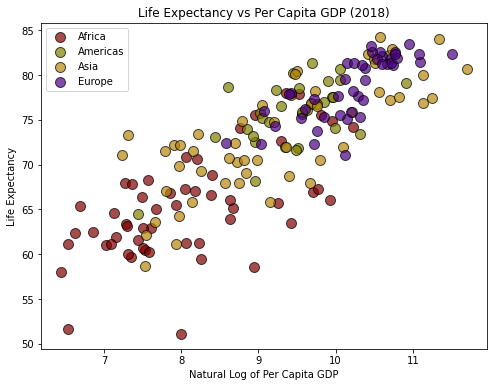

In [13]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['maroon', 'olive', 'darkgoldenrod','indigo']

plt.figure(figsize=[8,6])

for j in range(0, len(continent_list)):
    sel = []
    [sel.append(i) for i in range(0, len(continent)) if continent[i] == continent_list[j] and year[i] == 2018]
    
    temp_pcgdp = [np.log(pcgdp)[i] for i in sel]
    temp_life_exp = [life_exp[i] for i in sel]
    
    plt.scatter(x=temp_pcgdp, y=temp_life_exp, s=100, alpha=0.7,
                color=color_list[j], edgecolor='black', label=continent_list[j].title())

plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()

### Trends Analysis of selected countries
This section visualizes the population and life expectancy trends of China, Nigeria, Japan, Indian and Brazil over time

In [14]:
year_range = list(range(1800, 2019))
China = population[country == 'China']
Nigeria = population[country == 'Nigeria']
Japan = population[country == 'Japan']
India = population[country == 'India']
Brazil = population[country == 'Brazil']

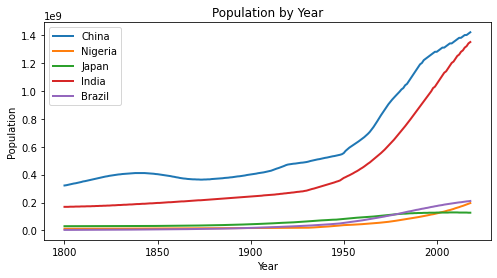

In [15]:
plt.figure(figsize=[8,4])

plt.plot(year_range, China, lw=2, label='China')
plt.plot(year_range, Nigeria, lw=2, label='Nigeria')
plt.plot(year_range, Japan, lw=2, label='Japan')
plt.plot(year_range, India, lw=2, label='India')
plt.plot(year_range, Brazil, lw=2, label='Brazil')


plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Year')
plt.show()

In [16]:
# change in life expectancy over time
year_range = list(range(1800, 2019))
China = life_exp[country == 'China']
Nigeria = life_exp[country == 'Nigeria']
Japan = life_exp[country == 'Japan']
India = life_exp[country == 'India']
Brazil = life_exp[country == 'Brazil']

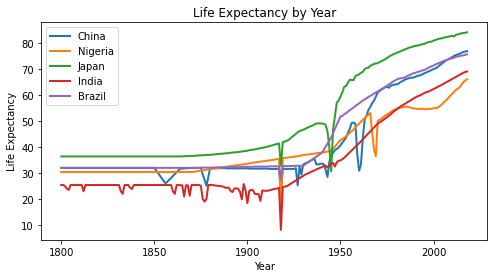

In [19]:
plt.figure(figsize=[8,4])

plt.plot(year_range, China, lw=2, label='China')
plt.plot(year_range, Nigeria, lw=2, label='Nigeria')
plt.plot(year_range, Japan, lw=2, label='Japan')
plt.plot(year_range, India, lw=2, label='India')
plt.plot(year_range, Brazil, lw=2, label='Brazil')


plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.show()

### Adding two new columns total_gdp, and total_life_exp.
Entries in the column total_gdp will record the total GDP of a specific country in a given year, and will be calculated by multiplying population and gdp_per_cap. Similarly, entries in total_life_exp will be calculated by multiplying population by life_exp. This column can be viewed as an estimate of the total number of years that people living in the country at that time would be collectively expected to live. 

In [23]:
df.loc[:,'total_gdp'] = df.loc[:,'population'] * df.loc[:,'gdp_per_cap']
df.loc[:,'total_life_exp'] = df.loc[:,'population'] * df.loc[:,'life_exp']
df.head()

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
0,Afghanistan,1800,asia,3280000,28.2,603,30.5,1977840000,92496000.0
1,Albania,1800,europe,410000,35.4,667,38.9,273470000,14514000.0
2,Algeria,1800,africa,2500000,28.8,715,56.2,1787500000,72000000.0
3,Angola,1800,africa,1570000,27.0,618,57.2,970260000,42390000.0
4,Antigua and Barbuda,1800,americas,37000,33.5,757,40.0,28009000,1239500.0


#### Sorting by Gini index to find the 10 countries with the least amount of income inequality in 2018.

In [27]:
df_2018 = df.loc[df.year == 2018, :]
df_2018.sort_values(by='gini', ascending=False).head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40260,South Africa,2018,africa,57400000,63.5,12300,63.0,706020000000,3.644900e+09
40268,Suriname,2018,americas,568000,71.6,13200,61.0,7497600000,4.066880e+07
40133,Botswana,2018,africa,2330000,66.9,16500,60.5,38445000000,1.558770e+08
40225,Namibia,2018,africa,2590000,65.7,10500,59.1,27195000000,1.701630e+08
40294,Zambia,2018,africa,17600000,59.5,3860,57.1,67936000000,1.047200e+09
40143,Central African Republic,2018,africa,4740000,51.6,689,56.2,3265860000,2.445840e+08
40203,Lesotho,2018,africa,2260000,51.1,2960,54.2,6689600000,1.154860e+08
40223,Mozambique,2018,africa,30500000,61.1,1200,54.0,36600000000,1.863550e+09
40128,Belize,2018,americas,382000,72.5,7710,53.3,2945220000,2.769500e+07
40269,Swaziland,2018,africa,1390000,58.6,7600,51.5,10564000000,8.145400e+07


#### Sorting the dataset to find the 10 countries with the highest life expectancy in 2018

In [28]:
df_2018.sort_values(by='life_exp', ascending=False).head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40193,Japan,2018,asia,127000000,84.2,39100,32.1,4965700000000,1.069340e+10
40255,Singapore,2018,asia,5790000,84.0,83900,40.9,485781000000,4.863600e+08
40271,Switzerland,2018,europe,8540000,83.5,57100,32.3,487634000000,7.130900e+08
40263,Spain,2018,europe,46400000,83.2,34700,36.2,1610080000000,3.860480e+09
40119,Australia,2018,asia,24800000,82.9,45800,32.3,1135840000000,2.055920e+09
40191,Italy,2018,europe,59300000,82.6,35200,35.4,2087360000000,4.898180e+09
40184,Iceland,2018,europe,338000,82.6,47400,27.8,16021200000,2.791880e+07
40169,France,2018,europe,65200000,82.6,39000,32.7,2542800000000,5.385520e+09
40233,Norway,2018,europe,5350000,82.4,64800,27.5,346680000000,4.408400e+08
40207,Luxembourg,2018,europe,590000,82.4,99000,33.8,58410000000,4.861600e+07


### Visualizing The Relationship Between Life Expectancy and Income Inequality

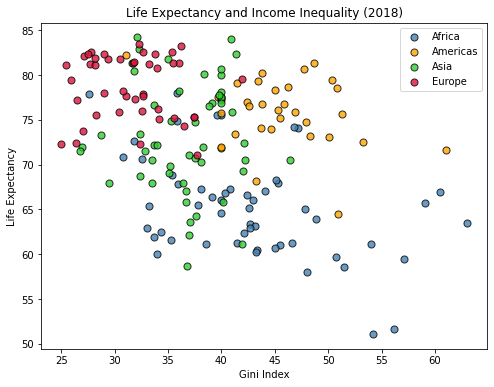

In [29]:
continent_list = ['africa', 'americas', 'asia', 'europe']
colors = ['steelblue', 'orange', 'limegreen', 'crimson']
plt.figure(figsize = [8,6])
for i, c in enumerate(continent_list):
    plt.scatter(df_2018.loc[df_2018.continent == c,'gini'], 
                df_2018.loc[df_2018.continent == c,'life_exp'],
                s=50, edgecolor='k', alpha=0.8, label=c.title(),
                color=colors[i])

plt.xlabel('Gini Index')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy and Income Inequality (2018)')   
plt.legend()
plt.show()

It does appear as though there is some relationship between life expectancy and Gini index. Countries with lower levels of income inequality tend to also have a higher life expectancy.

#### Per Capita GDP, Total Polulation and Life Expectancy By Continent in 2018
This will be done by finding the total population, total GDP, and population weighted life expectancy of each continent.

In [30]:
grouped = df_2018.loc[:,['continent','population',
                         'total_gdp', 'total_life_exp']
                     ].groupby('continent').sum()
grouped

,population,total_gdp,total_life_exp
continent,,,
africa,1287150200,6049509310000,8.477140e+10
americas,1010978000,29023263900000,7.840079e+10
asia,4455113000,56602608160000,3.261415e+11
europe,841959000,26550266400000,6.600596e+10


### Logistic Regression
In this section a logistic regression model to predict the label continent using the columns life_exp, gdp_per_cap, and gini as features. This will be achieved by creating a 2D feature array named X4 containing the relevant features, as well as a 1D label array named y4 containing the label

In [32]:
gm18 = df.loc[df.year == 2018,:].reset_index(drop=True)

In [33]:
X4 = gm18.iloc[:,4:].values
y4 = gm18.iloc[:,2].values

In [34]:
# Using train_test_split() to split the data into training and testing sets with a split of 70/30 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.3, random_state=1, stratify=y4)


# print shape
print('Training Features Shape:', X_train_4.shape)
print('Test Features Shape:    ', X_test_4.shape)

Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)


#### Creating a logistic regression model that can be used to estimate the probability that a country is in any particular continental region based on the feature values

In [35]:
gm_mod = LogisticRegression(solver='lbfgs', penalty='none', multi_class='multinomial', max_iter = 300)
gm_mod.fit(X_train_4, y_train_4)

print('Intercept:   ',  gm_mod.intercept_)
print("Coefficients: \n", gm_mod.coef_)

Intercept:    [ 0.00206119 -0.00474721  0.00333324 -0.00064723]
Coefficients: 
 [[-8.83459472e-02 -1.02954896e-04  2.01025741e-01]
 [-8.62682980e-02  3.31656925e-05  1.59762530e-01]
 [ 1.93453912e-02  2.94716407e-05 -2.32824256e-02]
 [ 1.55268854e-01  4.03175628e-05 -3.37505846e-01]]


Calculating the accuracy score for the model on both the training set and the test set.

In [36]:
gm_mod_train = gm_mod.score(X_train_4, y_train_4)
gm_mod_test =  gm_mod.score(X_test_4, y_test_4)


print('Training Accuracy:  ',round(gm_mod_train,4))
print('Testing Accuracy:', round(gm_mod_test,4))

Training Accuracy:   0.625
Testing Accuracy: 0.5893


Using the model to generate predictions the continental region of countries in the test set.

In [37]:
test_pred_4 = gm_mod.predict(X_test_4)


print('Observed Labels: ', y_test_4[:8])
print('Predicted Labels:', test_pred_4[:8])

Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: ['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


We will use our model to estimate the probability of countries in the test set being in each of the four continents based on their feature values.

In [38]:
gm_proba = gm_mod.predict_proba(X_test_4)

gm_proba = pd.DataFrame(gm_proba, columns = ['africa', 'americas','asia','europe'])
gm_proba[:10]

,africa,americas,asia,europe
0,0.066303,0.258957,0.578821,0.095919
1,0.001106,0.043577,0.358086,0.597231
2,0.663193,0.210245,0.123090,0.003471
3,0.226951,0.261422,0.457112,0.054516
4,0.002027,0.004892,0.112216,0.880865
5,0.001844,0.023808,0.252206,0.722142
6,0.630642,0.218362,0.147071,0.003925
7,0.000027,0.000734,0.033116,0.966124
8,0.001237,0.010807,0.163282,0.824675
9,0.178203,0.117534,0.492549,0.211714


Creating a new dataframe with fictitious features to test the model

In [39]:
gm_new = pd.DataFrame([[75,5000,30],[75,5000,40],[75,5000,50],[75,20000,30],[75,20000,40],[75,20000,50]],
                       columns = ['life_exp','gdp_per_cap','gini'])

gm_new_proba = gm_mod.predict_proba(gm_new)

In [40]:
gm_new_proba = pd.DataFrame(gm_new_proba, columns = ['africa', 'americas','asia','europe'])
gm_new_proba[:10]

,africa,americas,asia,europe
0,0.038371,0.025509,0.286667,0.649452
1,0.432807,0.190449,0.343168,0.033575
2,0.726868,0.211707,0.061166,0.000258
3,0.004860,0.024894,0.264677,0.705569
4,0.092292,0.312892,0.533408,0.061408
5,0.259037,0.581283,0.158891,0.000790


According to our model:

- Country 0 is most likely in europe.
- Country 1 is most likely in africa.
- Country 2 is most likely in africa.
- Country 3 is most likely in europe.
- Country 4 is most likely in asia.
- Country 5 is most likely in americas.